# SQL & Pandas

In [5]:
import sqlite3
import pandas as pd
conn = sqlite3.Connection('data (3).sqlite')

In [6]:
products_df = pd.read_sql("""
                          SELECT *
                          FROM products
                          """, conn)
products_df.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


In [9]:
# Need to make buyPrice numeric
products_df['buyPrice'] = products_df['buyPrice'].astype(float)

In [8]:
od_df = pd.read_sql("""
                    SELECT *
                    FROM orderDetails
                    """, conn)

od_df.head()

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4


# Pandas Query Method

In [10]:
# Getting Data using slicing syntax
foo_df1 = products_df[products_df["buyPrice"] >= 50]

In [11]:
# Using The query method
foo_df2 = products_df.query("buyPrice >= 50")

In [12]:
# These two lines are equivalent!
print(foo_df1.shape, foo_df2.shape)

(62, 9) (62, 9)


# Combining Conditionals

In [14]:
foo_df = products_df.query("buyPrice >=50 & productLine == 'Classic Cars'")
foo_df.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00
5,S10_4962,1962 LanciaA Delta 16V,Classic Cars,1:10,Second Gear Diecast,Features include: Turnable front wheels; steer...,6791,103.42,147.74
6,S12_1099,1968 Ford Mustang,Classic Cars,1:12,Autoart Studio Design,"Hood, doors and trunk all open to reveal highl...",68,95.34,194.57
7,S12_1108,2001 Ferrari Enzo,Classic Cars,1:12,Second Gear Diecast,Turnable front wheels; steering function; deta...,3619,95.59,207.80


# Pandas SQL

In [15]:
! pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26892 sha256=9d8a7a0cd5289b3c32a69d9b392c44afaac418285787a7de7d4974dd2566c63c
  Stored in directory: c:\users\aleja\appdata\local\pip\cache\wheels\15\a1\e7\6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


  DEPRECATION: Building 'pandasql' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pandasql'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [16]:
from pandasql import sqldf

In [23]:
# when you pass a query into pysqldf, the lambda will also pass along the globals, saving you that repetitive task
pysqldf = lambda q: sqldf(q, globals())

In [18]:
pysqldf

<function __main__.<lambda>(q)>

In [20]:
# Query for Pandas
top_5_query_pandas = """
SELECT productCode, productName, SUM(quantityOrdered) as TotalOrdered
    FROM products_df
        JOIN od_df
            USING(productCode)
GROUP BY productCode
ORDER BY TotalOrdered DESC
Limit 5
"""

top_5_query_pandas

'\nSELECT productCode, productName, SUM(quantityOrdered) as TotalOrdered\n    FROM products_df\n        JOIN od_df\n            USING(productCode)\nGROUP BY productCode\nORDER BY TotalOrdered DESC\nLimit 5\n'

In [21]:
# Query for SQL
top_5_query_sql = """
SELECT productCode, productName, SUM(quantityOrdered) as TotalOrdered
    FROM products
        JOIN orderDetails
            USING(productCode)
GROUP BY productCode
ORDER BY TotalOrdered DESC
Limit 5
"""
top_5_query_sql

'\nSELECT productCode, productName, SUM(quantityOrdered) as TotalOrdered\n    FROM products\n        JOIN orderDetails\n            USING(productCode)\nGROUP BY productCode\nORDER BY TotalOrdered DESC\nLimit 5\n'

In [22]:
top_5 = pysqldf(top_5_query_pandas)
top_5.head()

,productCode,productName,TotalOrdered
0,S18_3232,1992 Ferrari 360 Spider red,1808
1,S18_1342,1937 Lincoln Berline,1111
2,S700_4002,American Airlines: MD-11S,1085
3,S18_3856,1941 Chevrolet Special Deluxe Cabriolet,1076
4,S50_1341,1930 Buick Marquette Phaeton,1074


In [24]:
# Use Pandas to read query
top_5_best = pd.read_sql(top_5_query_sql, conn)
top_5_best.head()

,productCode,productName,TotalOrdered
0,S18_3232,1992 Ferrari 360 Spider red,1808
1,S18_1342,1937 Lincoln Berline,1111
2,S700_4002,American Airlines: MD-11S,1085
3,S18_3856,1941 Chevrolet Special Deluxe Cabriolet,1076
4,S50_1341,1930 Buick Marquette Phaeton,1074


In [25]:
# Example

# Calculate the percentage of total sales for each product among the top 5
total_sales = top_5_best['TotalOrdered'].sum()

# Add as new column
top_5_best['SalesPercentage'] = top_5_best['TotalOrdered'] / total_sales * 100

top_5_best.head()

,productCode,productName,TotalOrdered,SalesPercentage
0,S18_3232,1992 Ferrari 360 Spider red,1808,29.379266
1,S18_1342,1937 Lincoln Berline,1111,18.053299
2,S700_4002,American Airlines: MD-11S,1085,17.630809
3,S18_3856,1941 Chevrolet Special Deluxe Cabriolet,1076,17.484563
4,S50_1341,1930 Buick Marquette Phaeton,1074,17.452064


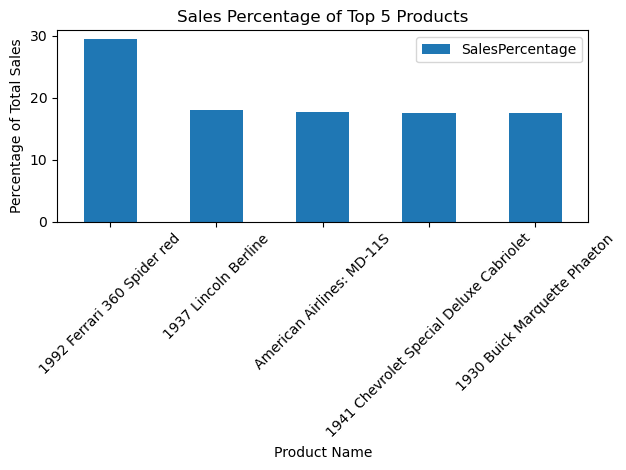

In [26]:
# Chart

import matplotlib.pyplot as plt

# Create Bar chart
top_5_best.plot(x='productName', y='SalesPercentage', kind='bar')
plt.title('Sales Percentage of Top 5 Products')
plt.ylabel('Percentage of Total Sales')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()